In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
from sklearn.datasets import make_circles

# Tạo 100 mẫu
n_samples = 1000

# Tạo circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
X.shape

(1000, 2)

In [5]:
y[:100]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [6]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0], 'X1':X[:,1], 'label':y})
circles.head(15)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

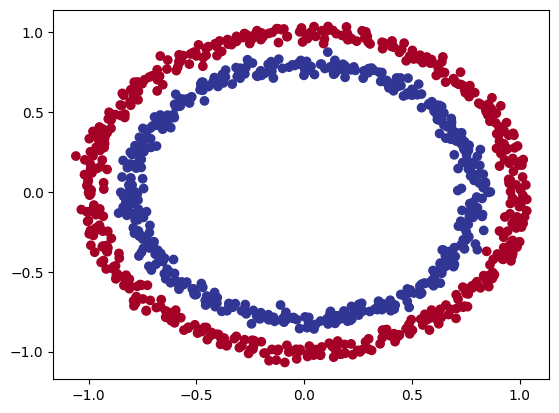

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c = y, cmap= plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X), len(y)

(1000, 1000)

In [11]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [12]:
X[900], y[900]

(array([-0.51014426, -0.62862776]), 1)

In [13]:
tf.random.set_seed(42)

# tạo mô hình
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#biên dịch mô hình
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), #phân loại nhị phân
                optimizer= tf.keras.optimizers.SGD(),   
                metrics=['accuracy'])

# fit mô hình
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 6.0661 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 5.8302 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 968us/step - loss: 6.1050 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 970us/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


In [14]:
#Huấn luyện với nhiều epochs
model_1.fit(X, y, epochs=200, verbose=0) # verbose = 0 để loại bỏ cập nhật huấn luyện, tức chỉ in mỗi lần thứ 200 ra
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [15]:
tf.random.set_seed(42)

#tạo mô hình
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1), #thêm 1 lớp, chứa 1 nơ ron
    tf.keras.layers.Dense(1) #thêm 1 lớp nữa,chứa 2 nơ ron, tổng cộng là 2 lớp
])

# 2. Biên dịch mô hình
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Khớp mô hình
model_2.fit(X, y, epochs=100, verbose=0) # đặt verbose=0 để in ra ít kết quả hơn

In [16]:
model_2.evaluate(X,y)
#đánh giá

32/32 [==============================] - 0s 756us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932693719863892, 0.5]

Vẫn yếu nên thử thêm trường hợp tiếp theo

In [17]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình (lần này là 3 lớp)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), #  thêm 100 nơ-ron dày, lớp 1
  tf.keras.layers.Dense(10), # thêm một lớp khác có 10 nơ-ron, lớp 2
  tf.keras.layers.Dense(1) # lớp 3, 1 nơ ron
])
#Biên dịch mô hình
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # sử dụng Adam thay vì SGD
                metrics=['accuracy'])

# Huấn luyện mô hình
model_3.fit(X,y, epochs=100, verbose=0) # thử với 100 epochs, lấy dữ liệu lần thứ 100

In [18]:
model_3.evaluate(X,y)
#đánh giá

32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5010


[0.695705771446228, 0.5009999871253967]

In [19]:
#Tạo hàm vẽ biểu đồ ranh giới
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Tạo các giá trị X (chúng ta sẽ dự đoán trên tất cả các giá trị)
    x_in = np.c_[xx.ravel(), yy.ravel()] # chồng các mảng 2D với nhau
    # Đưa ra dự đoán sử dụng mô hình đã huấn luyện
    y_pred = model.predict(x_in)

    # Kiểm tra cho đa lớp
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # Chúng ta cần reshape các dự đoán để chuẩn bị vẽ biểu đồ
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Vẽ biểu đồ ranh giới quyết định
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 949us/step
doing binary classifcation...


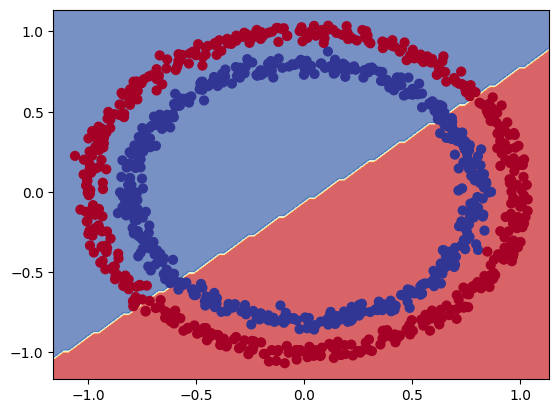

In [20]:
plot_decision_boundary(model_3, X, y)

In [21]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo một số dữ liệu hồi quy
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Chia thành tập huấn luyện và tập kiểm tra
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [22]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo lại mô hình
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Thay đổi loss và metrics của mô hình đã biên dịch
model_3.compile(loss=tf.keras.losses.mae, # đổi hàm mất mát thành hồi quy cụ thể
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # đổi metrics thành hồi quy cụ thể

# Khớp mô hình đã biên dịch
model_3.fit(X_reg_train.reshape(-1,1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 264.2675 - mae: 264.2675
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 140.8489 - mae: 140.8489
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 52.0070 - mae: 52.0070
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 78.4819 - mae: 78.4819
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 69.2300 - mae: 69.2300
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 45.0462 - mae: 45.0462
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 47.7064 - mae: 47.7064
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 41.9098 - mae: 41.9098
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.1610 - mae: 43.1610
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.1147 - mae: 42.1147
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 10ms/step


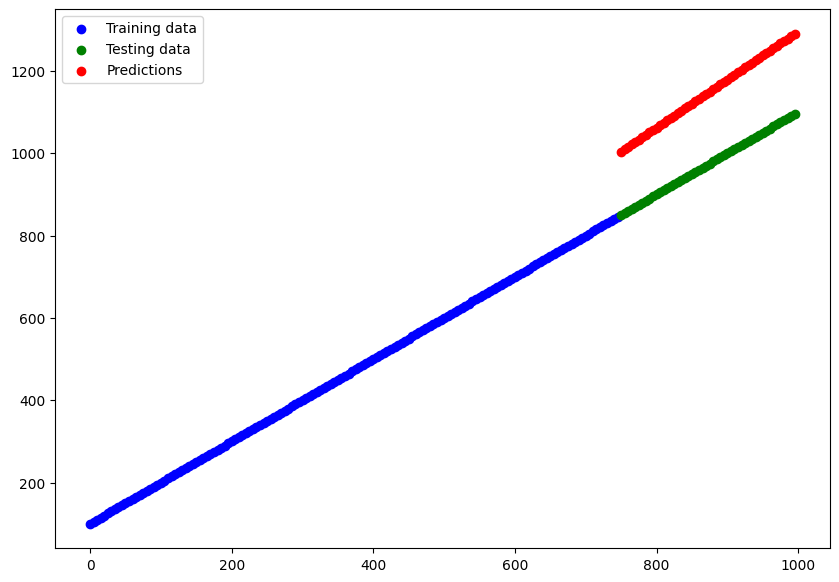

In [23]:
# Đưa ra dự đoán với mô hình đã huấn luyện
y_reg_preds = model_3.predict(y_reg_test)

# Vẽ các dự đoán của mô hình so với dữ liệu hồi quy
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

In [24]:
# Đặt random seed
tf.random.set_seed(42)

# Tạo mô hình
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 lớp ẩn với kích hoạt tuyến tính
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" là viết tắt của "learning rate"
                metrics=["accuracy"])

# Khớp mô hình
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2738 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1842 - accuracy: 0.4540
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0736 - accuracy: 0.4270
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9111 - accuracy: 0.4160
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6747 - accuracy: 0.4140
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6026 - accuracy: 0.4110
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4465 - accuracy: 0.4160
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3188 - accuracy: 0.4200
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2098 - accuracy: 0.4230
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0859 - accuracy: 0.4230
Epoch 11/

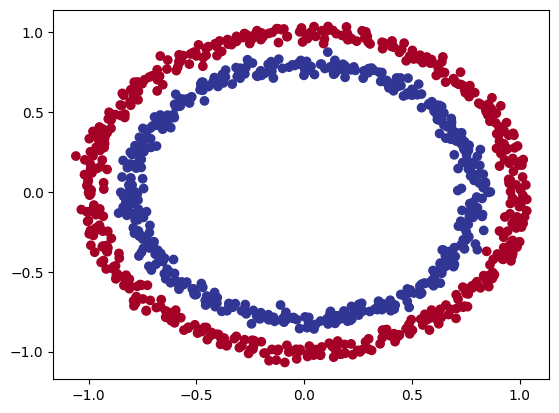

In [25]:
# Kiểm tra dữ liệu của chúng ta
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 917us/step
doing binary classifcation...


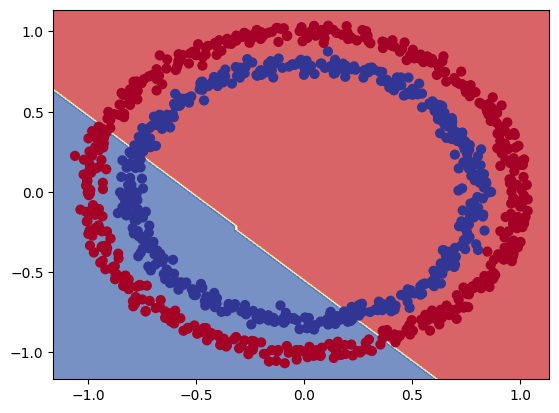

In [26]:
#Kiểm tra ranh giới quyết định (phần màu xanh là lớp màu xanh, màu vàng là phần giao nhau, màu đỏ là lớp màu đỏ )
plot_decision_boundary(model_4, X, y)

In [27]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình với kích hoạt phi tuyến tính
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # cũng có thể đặt activation='relu'
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [28]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 1, 4 nơ-ron, kích hoạt ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 2, 4 nơ-ron, kích hoạt ReLU
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # tốc độ học mặc định của Adam là 0.001
                metrics=['accuracy'])

# Khớp mô hình
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.8740 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5261 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2607 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1689 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0946 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0346 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9874 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9503 - accuracy: 0.4600
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9216 - accuracy: 0.4160
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8983 - accuracy: 0.4380
Epoch 11/

In [29]:
# Đánh giá mô hình
model_6.evaluate(X, y)

32/32 [==============================] - 0s 760us/step - loss: 0.6837 - accuracy: 0.5760


[0.68373703956604, 0.5759999752044678]

313/313 [==============================] - 0s 690us/step
doing binary classifcation...


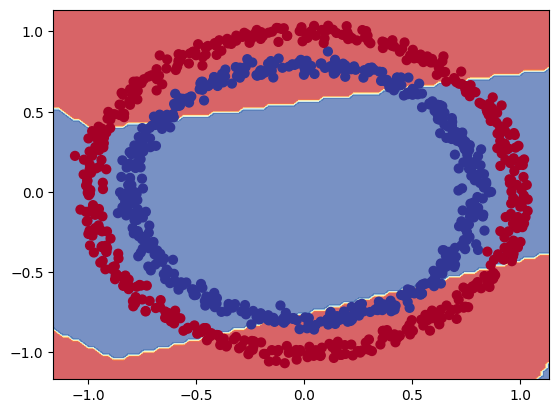

In [30]:
# Kiểm tra các dự đoán sử dụng 2 lớp ẩn
plot_decision_boundary(model_6, X, y)

In [31]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 1, kích hoạt ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 2, kích hoạt ReLU
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # lớp đầu ra, kích hoạt sigmoid
])

# Biên dịch mô hình
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Khớp mô hình
history = model_7.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.5130
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5170
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5220
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5270
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5200
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5290
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5300
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5370
Epoch 11/

In [32]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 777us/step - loss: 0.4663 - accuracy: 0.8520


[0.4662979543209076, 0.8519999980926514]

313/313 [==============================] - 0s 682us/step
doing binary classifcation...


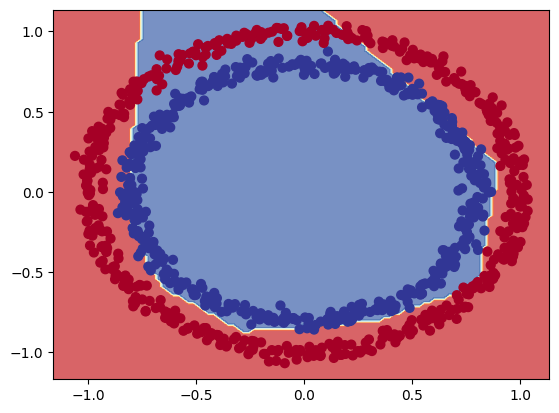

In [33]:
# Xem các dự đoán của mô hình với kích hoạt relu và sigmoid
plot_decision_boundary(model_7, X, y)